### Problem Statement

The objective is to find the person is wearing the mask or not by using computer vision .

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
import os 
import cv2
import matplotlib.pyplot as plt

### Reading the file

In [3]:
dev = "G:\cnn\mask and no mask"
category =["with_mask","without_mask"]

In [4]:
for i in category :
    print(i)

with_mask
without_mask


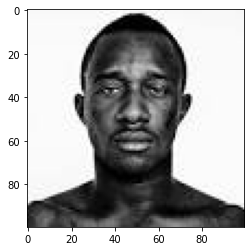

In [5]:
for i in category:
    folders = os.path.join(dev, i) #
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)    
        plt.imshow(image_array) # this is used to show the image 
        break 

In [6]:
image_size = 200

In [7]:
input_image = []    
for i in category:
    folders = os.path.join(dev ,i)
    label   = category.index(i)   
    print("Value of label is "  , label)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) 
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image.append([image_array , label])

Value of label is  0
Value of label is  1


In [8]:
input_image

[[array([[[34, 62, 56],
          [29, 54, 45],
          [36, 55, 46],
          ...,
          [ 8, 22, 18],
          [19, 43, 38],
          [18, 40, 33]],
  
         [[31, 57, 51],
          [30, 54, 45],
          [36, 57, 48],
          ...,
          [38, 49, 46],
          [10, 32, 24],
          [24, 43, 35]],
  
         [[29, 52, 47],
          [33, 56, 47],
          [38, 59, 50],
          ...,
          [58, 68, 62],
          [ 8, 26, 18],
          [33, 49, 38]],
  
         ...,
  
         [[34, 72, 59],
          [35, 71, 59],
          [39, 70, 61],
          ...,
          [12, 15, 16],
          [ 7,  9, 13],
          [ 7,  9, 13]],
  
         [[31, 72, 57],
          [35, 69, 56],
          [40, 67, 57],
          ...,
          [11, 12, 16],
          [12, 13, 17],
          [12, 12, 18]],
  
         [[27, 69, 52],
          [30, 65, 51],
          [37, 62, 52],
          ...,
          [14, 15, 19],
          [13, 13, 19],
          [13, 12, 21]]], dtype=u

In [9]:
len(input_image)

7553

In [10]:
np.random.shuffle(input_image)

In [11]:
x = []
y = []
for x_values, labels in input_image:
    x.append(x_values)
    y.append(labels)

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
x.shape

(7553, 200, 200, 3)

In [14]:
y

array([0, 0, 0, ..., 1, 0, 1])

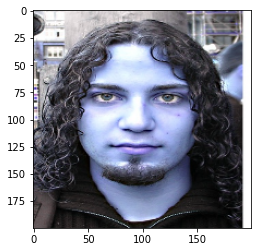

In [15]:
plt.imshow(x[152])

### Sampling 

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size =.2)

In [17]:
x_train =x_train/255


In [18]:
x_train.shape

(6042, 200, 200, 3)

In [19]:
x_test.shape

(1511, 200, 200, 3)

In [ ]:
train_x.class_indices

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout

In [21]:
from tensorflow.keras.utils import to_categorical 

### Creating the Neural network 

In [22]:
model = Sequential()

model.add(Conv2D(filters = 18 , kernel_size = (7,7) , activation ='relu' , padding='same'))
model.add(MaxPool2D(pool_size=(2 , 2)))
model.add(Flatten())

model.add(Dense(264 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

In [23]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy']) 

### Training the model 

In [24]:
model1 = model.fit(x_train , y_train ,epochs = 9 , validation_split=.2 , batch_size =64)

Epoch 1/9
76/76 [==============================] - 280s 4s/step - loss: 2.0777 - accuracy: 0.7759 - val_loss: 0.3851 - val_accuracy: 0.8453
Epoch 2/9
76/76 [==============================] - 307s 4s/step - loss: 0.2828 - accuracy: 0.8934 - val_loss: 0.3296 - val_accuracy: 0.8610
Epoch 3/9
76/76 [==============================] - 211s 3s/step - loss: 0.2239 - accuracy: 0.9174 - val_loss: 0.2963 - val_accuracy: 0.8743
Epoch 4/9
76/76 [==============================] - 211s 3s/step - loss: 0.1567 - accuracy: 0.9419 - val_loss: 0.3326 - val_accuracy: 0.8743
Epoch 5/9
76/76 [==============================] - 209s 3s/step - loss: 0.1115 - accuracy: 0.9623 - val_loss: 0.2879 - val_accuracy: 0.8991
Epoch 6/9
76/76 [==============================] - 208s 3s/step - loss: 0.0689 - accuracy: 0.9752 - val_loss: 0.3163 - val_accuracy: 0.8966
Epoch 7/9
76/76 [==============================] - 216s 3s/step - loss: 0.0403 - accuracy: 0.9901 - val_loss: 0.4275 - val_accuracy: 0.8916
Epoch 8/9
76/76 [===

## Prediction on test data

In [25]:
pred_values = model.predict(x_test)

48/48 [==============================] - 20s 413ms/step


In [26]:
pred_classes = np.argmax(pred_values, axis =1)
pred_classes

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

## Accuracy check

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,pred_classes)

array([[733,  23],
       [196, 559]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, pred_classes)

0.8550628722700199

## Result:
    

we got 85 % persent accuracy on test data for person is wearing a mask or not .

### pickling (saving the model )

In [33]:

model.save('cnn_mask_detector.h5') # model is save with name this 